In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('heart.csv',na_values='?')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


Here:
1. Age is the age of the patient in years.
2. sex is the gender denoted by 0-female or 1-male.
3. cp is the chest pain type:
    value 1: typical angina
    value 2: atypical angina
    value 3: non-anginal pain
    value 4: asymptomatic
4. trestbps is the resting blood pressure.
5. chol is the serum cholestrol.
6. fbs is the fasting blood sugar 1 is true, 0 is false.
7. restecg is the resting electrocardiographic results with values 0, 1, 2:
    value 0: normal
    value1: having ST-T wave abnormality
    value 2: showing probable left venticular hypertrophy by Estes criteria.
8. thalach is the maximum heartbeat achieved.
9. exang is the exercise enducing angina with 1 as yes and 0 as no.
10. oldpeak is the ST depression induced by exercise relative to rest.
11. slope is the slope of the peak exercise ST segment with values 1,2,3:
    value 1: upsloping
    value 2: flat
    value 3: downsloping
12. ca is the number of major vessels(0-3) colored by flourosopy.
13. thal : 3-normal, 6-fixed defect, 7-reversible defect
14. num is the target variable that tells the diagnosis of heart disease with values as 0, 1,2

In [4]:
data.shape

(303, 14)

In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

1. features ca and thal have few entries as null.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


All the features are of float type except our target variable num.

In [7]:
data.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


1. Age feature shows that the min age for patient is 29 and maximum age is 77.
2. ca and thal have null values as their count is not 303.
3. Standard Deviation for chol is high.
4. Trestbps, chol, thalach,oldpeak are the features in which there is a huge difference between the 75 percentile and the max. So this might indicate the presence of outliers.
5. Mean is higher than median  for all the features we can say that our data is skewed.

In [9]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.362605,0.127389,0.222853
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.093185,0.380936,0.224469
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233214,0.265246,0.407075
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.098773,0.133554,0.157754
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.119000,0.014214,0.070909
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.145478,0.071358,0.059186
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.128343,0.024531,0.183696
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.264246,-0.279631,-0.415040
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145570,0.329680,0.397057
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.295832,0.341004,0.504092


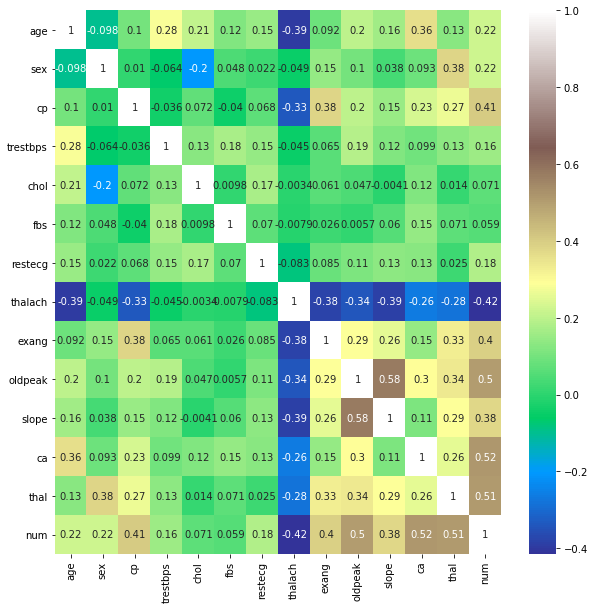

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),cmap='terrain',annot=True)

1. Thalach has a negative correlarion with target variable num and other features: age, cp, exang, oldpeak, slope, ca, thal.
2. Target-num has a positive correlation with cp, oldpeak, ca  and thal.
3. slope and old peak are positively correlated.

# Visualization:

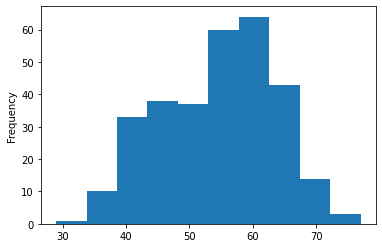

In [11]:
data['age'].plot.hist()

Mostly the patients in the data set lies in the age group of 40-65. so there is a possibility that middle aged people are more prone to heart disease.

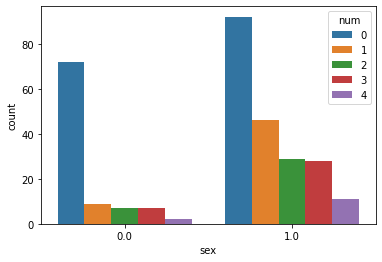

In [12]:
sns.countplot('sex',hue='num',data=data)

There is a significant difference in the male and the female patients. It might be concluded that male are more prone to heart disease.

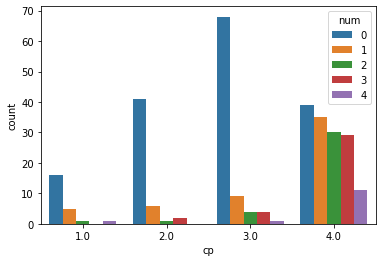

In [13]:
sns.countplot('cp',hue='num',data=data)

Asymptomatic people in chest pain are more likely to have a heart disease. 

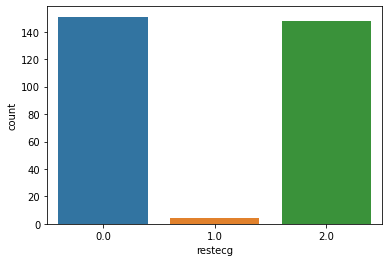

In [14]:
sns.countplot(data['restecg'])

A very few patient's resting ecg shows ST-T wave abnormality.

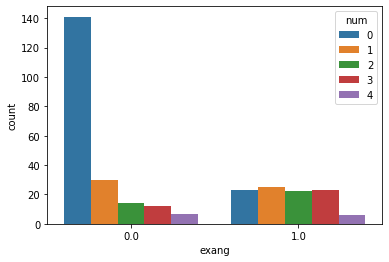

In [15]:
sns.countplot('exang',hue='num',data=data)

For people who did not experience engina during exercise they are less likely to have a heart disease.

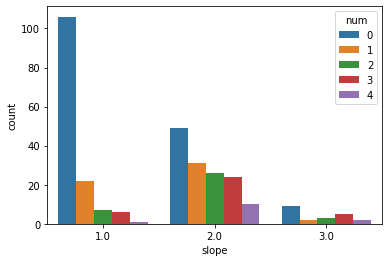

In [16]:
sns.countplot('slope',hue='num',data=data)

patients having a slope as upsloping they are less likley to have heart disease.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000278BB2C5400>,
      dtype=object)

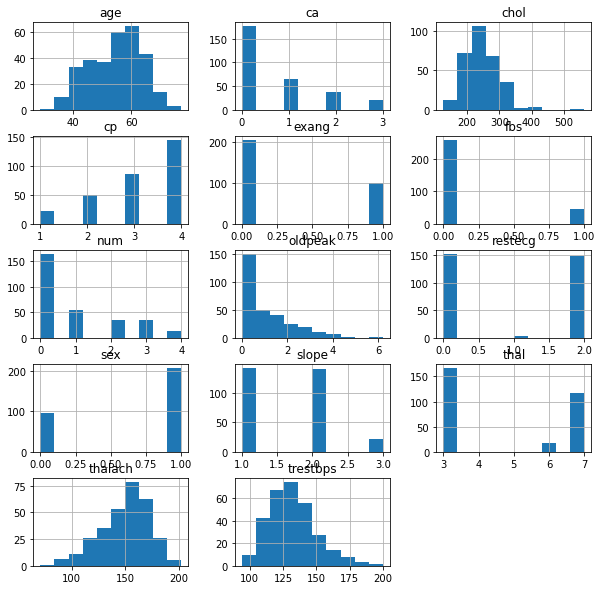

In [17]:
# observing the distribution of each column with histogrsm plot.
data.hist(figsize=(10,10),layout=(5,3))

BIVARIATE ANALYSIS

<Figure size 720x720 with 0 Axes>

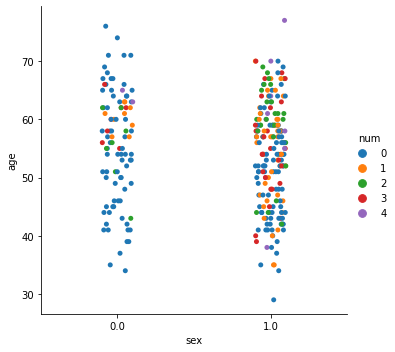

In [18]:
plt.figure(figsize=(10,10))
sns.catplot(x='sex',y='age',hue='num',data=data)

For female we can observe some red dots at a higher age. So there might be the possibility that older females are more prone to heart disease.
for male we can see red dots scattered in all the age groups there is no clear relationship of age with the heart disease in males.

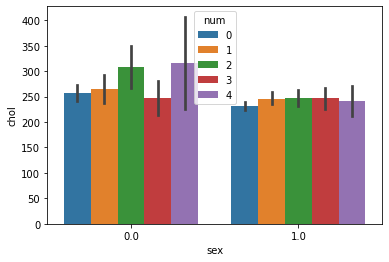

In [19]:
sns.barplot(x='sex',y='chol',hue='num',data=data)

1. In male cholestrol levels are not giving any information about the heart disease.
2. Females have a higher cholestrol than male. Also there is a possibility of a women with highr=er cholestrol to have a heart disease.

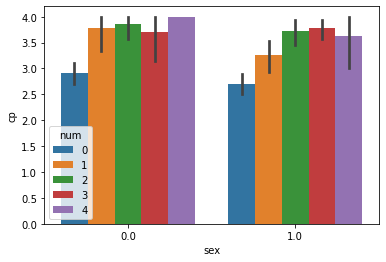

In [20]:
sns.barplot(x='sex',y='cp',hue='num',data=data)

For both male and female either the chest pain is non-anginal or asymptomatic.

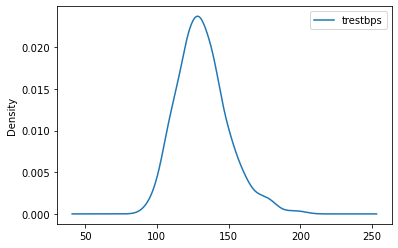

In [21]:
data.plot.kde(y='trestbps',x='num')

people with trestbps between 100-150 shows a higher tendency to have a heart disease.

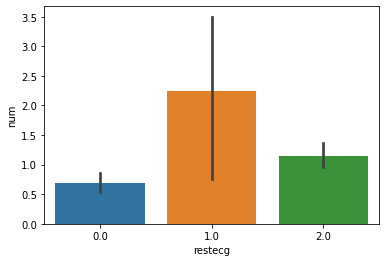

In [22]:
sns.barplot(x='restecg',y='num',data=data)

An ST-T wave abnormality might be indicative of a heart disease.

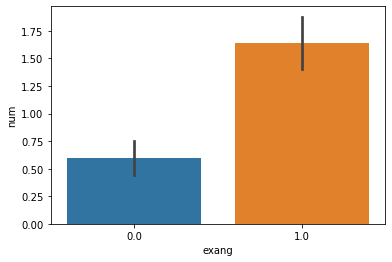

In [23]:
sns.barplot(x='exang',y='num',data=data)

People who have experienced angina during exercise are more prone to having a heart disease.

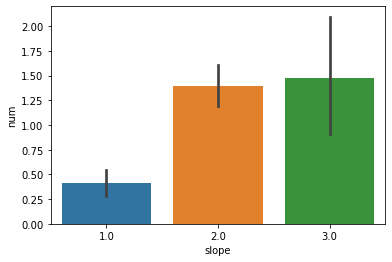

In [24]:
sns.barplot(x='slope',y='num',data=data)

A slope either flat or downsloping has a higher chance of getting a heart disease.

Statiscal analysis:

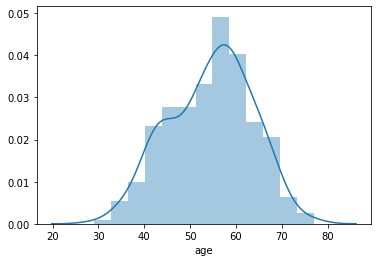

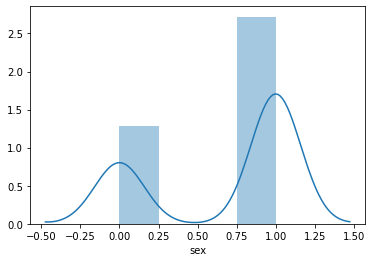

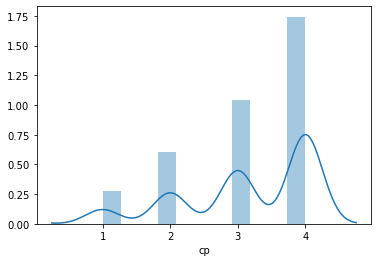

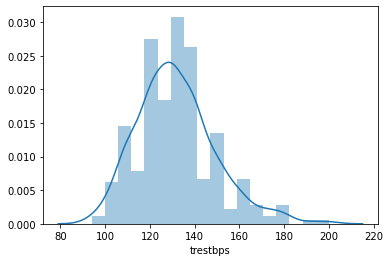

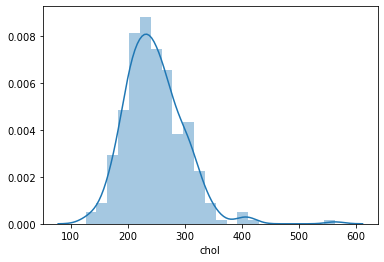

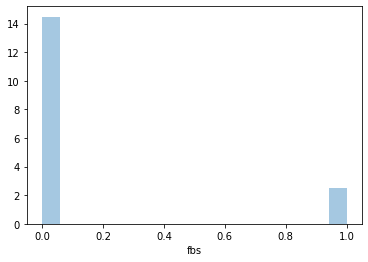

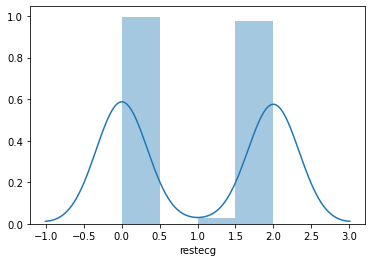

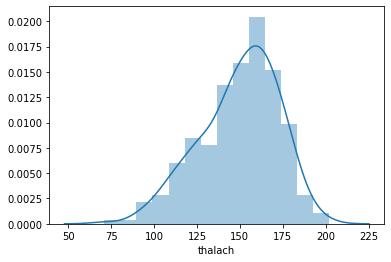

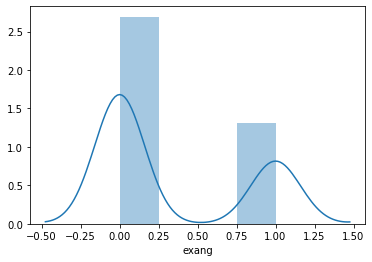

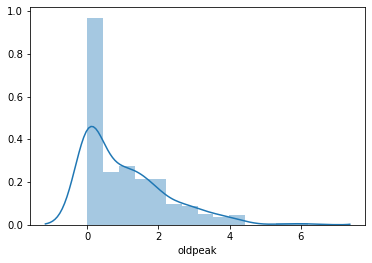

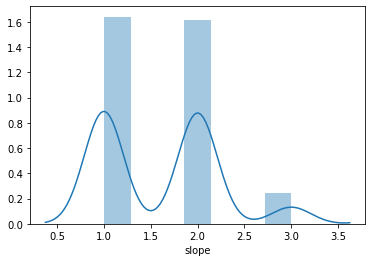

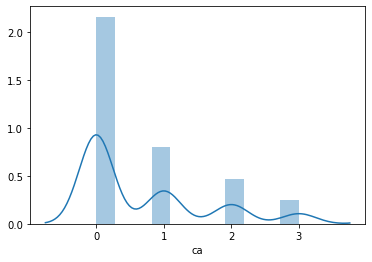

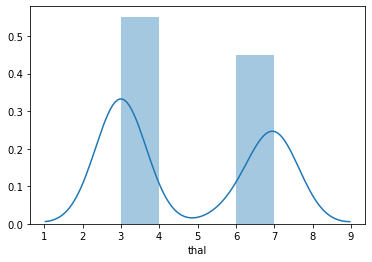

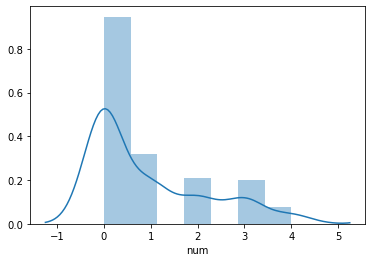

In [25]:
for i in data.columns:
    sns.distplot(data[i])
    plt.show()

observations:
1. Age is almost normally distributed.
2. sex is a categorical data with most of the values as 1.
3. cp is left skewed.
4. old peak is right skewed.
4. trestbps,thalach are normally distributed.

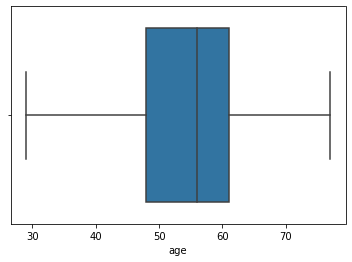

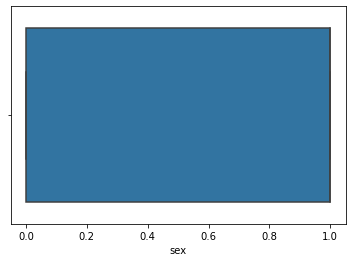

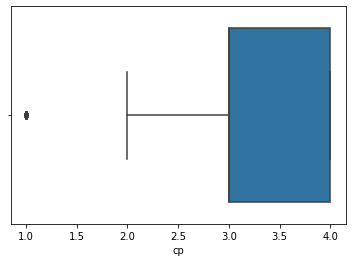

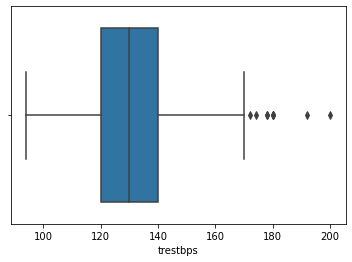

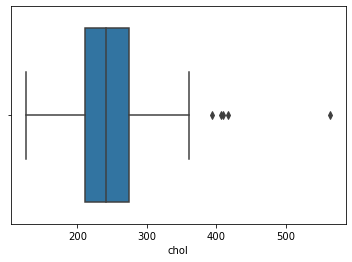

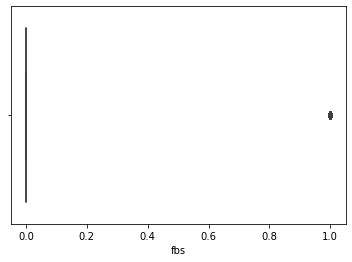

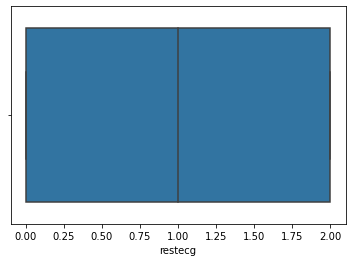

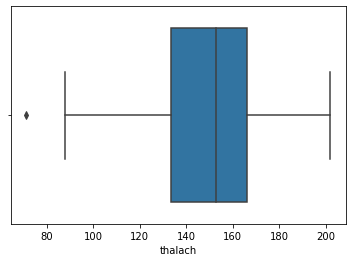

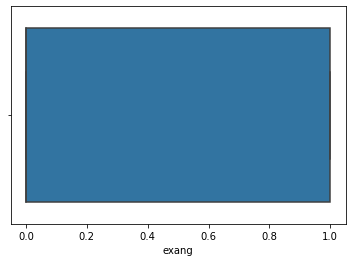

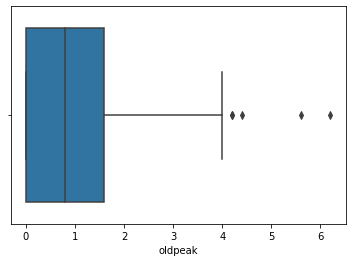

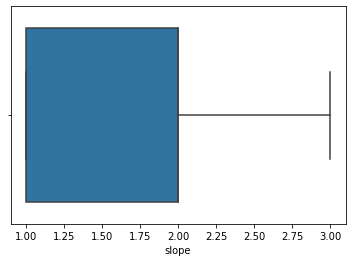

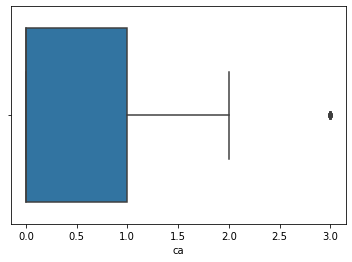

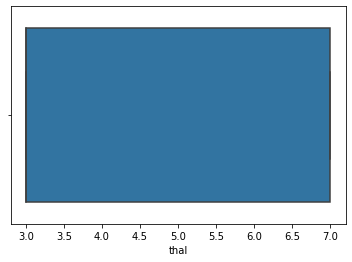

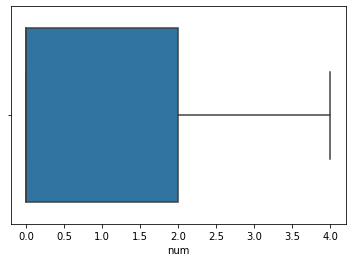

In [26]:
for i in data.columns:
    sns.boxplot(data[i])
    plt.show()

observations:
trestbps, chol, oldpeak has a few outliers. Rest the data seems fine.

In [27]:
#We had null values in our data set. Dealing with the null values
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

Here ca and thal have null values.

In [28]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy='median')

In [29]:
for i in data.columns:
    if data.isna().sum().loc[i]!=0:
        data[i]=si.fit_transform(data[i].values.reshape(-1,1))
    

In [30]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [31]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [32]:
data=pd.get_dummies(data,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'],drop_first=True)

In [33]:
data

,age,trestbps,chol,thalach,oldpeak,num,sex_1.0,cp_2.0,cp_3.0,cp_4.0,...,restecg_1.0,restecg_2.0,exang_1.0,slope_2.0,slope_3.0,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
0,63.0,145.0,233.0,150.0,2.3,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,67.0,160.0,286.0,108.0,1.5,2,1,0,0,1,...,0,1,1,1,0,0,0,1,0,0
2,67.0,120.0,229.0,129.0,2.6,1,1,0,0,1,...,0,1,1,1,0,0,1,0,0,1
3,37.0,130.0,250.0,187.0,3.5,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,41.0,130.0,204.0,172.0,1.4,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,110.0,264.0,132.0,1.2,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
299,68.0,144.0,193.0,141.0,3.4,2,1,0,0,1,...,0,0,0,1,0,0,1,0,0,1
300,57.0,130.0,131.0,115.0,1.2,3,1,0,0,1,...,0,0,1,1,0,1,0,0,0,1
301,57.0,130.0,236.0,174.0,0.0,1,0,1,0,0,...,0,1,0,1,0,1,0,0,0,0


In [34]:
#checking the skewness of the data
data.skew()

age           -0.209060
trestbps       0.706035
chol           1.135503
thalach       -0.537449
oldpeak        1.269720
num            1.058496
sex_1.0       -0.774935
cp_2.0         1.813882
cp_3.0         0.963719
cp_4.0         0.099625
fbs_1.0        1.986652
restecg_1.0    8.572643
restecg_2.0    0.046447
exang_1.0      0.742532
slope_2.0      0.153013
slope_3.0      3.408510
ca_1.0         1.397846
ca_2.0         2.273366
ca_3.0         3.513224
thal_6.0       3.746372
thal_7.0       0.470065
dtype: float64

In [36]:
#Treating skewness using log transform
list=['age','trestbps','chol','thalach','oldpeak']
for i in list:
    if data.skew().loc[i]>0.55:
        data[i]=np.log1p(data[i])

In [37]:
data.skew()

age           -0.209060
trestbps       0.281940
chol           0.081733
thalach       -0.537449
oldpeak        0.396825
num            1.058496
sex_1.0       -0.774935
cp_2.0         1.813882
cp_3.0         0.963719
cp_4.0         0.099625
fbs_1.0        1.986652
restecg_1.0    8.572643
restecg_2.0    0.046447
exang_1.0      0.742532
slope_2.0      0.153013
slope_3.0      3.408510
ca_1.0         1.397846
ca_2.0         2.273366
ca_3.0         3.513224
thal_6.0       3.746372
thal_7.0       0.470065
dtype: float64

In [38]:
data

,age,trestbps,chol,thalach,oldpeak,num,sex_1.0,cp_2.0,cp_3.0,cp_4.0,...,restecg_1.0,restecg_2.0,exang_1.0,slope_2.0,slope_3.0,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
0,63.0,4.983607,5.455321,150.0,1.193922,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,67.0,5.081404,5.659482,108.0,0.916291,2,1,0,0,1,...,0,1,1,1,0,0,0,1,0,0
2,67.0,4.795791,5.438079,129.0,1.280934,1,1,0,0,1,...,0,1,1,1,0,0,1,0,0,1
3,37.0,4.875197,5.525453,187.0,1.504077,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,41.0,4.875197,5.323010,172.0,0.875469,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,4.709530,5.579730,132.0,0.788457,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
299,68.0,4.976734,5.267858,141.0,1.481605,2,1,0,0,1,...,0,0,0,1,0,0,1,0,0,1
300,57.0,4.875197,4.882802,115.0,0.788457,3,1,0,0,1,...,0,0,1,1,0,1,0,0,0,1
301,57.0,4.875197,5.468060,174.0,0.000000,1,0,1,0,0,...,0,1,0,1,0,1,0,0,0,0


In [39]:
#removing outliers
from scipy.stats import zscore

In [40]:
z=np.abs(zscore(data))

In [41]:
data_new=data[(z<3).all(axis=1)]
print('Shape before removing outliers: ',data.shape)
print('Shape after removing outliers: ',data_new.shape)

Shape before removing outliers:  (303, 21)
Shape after removing outliers:  (243, 21)


In [42]:
data_new

,age,trestbps,chol,thalach,oldpeak,num,sex_1.0,cp_2.0,cp_3.0,cp_4.0,...,restecg_1.0,restecg_2.0,exang_1.0,slope_2.0,slope_3.0,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
2,67.0,4.795791,5.438079,129.0,1.280934,1,1,0,0,1,...,0,1,1,1,0,0,1,0,0,1
4,41.0,4.875197,5.323010,172.0,0.875469,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
5,56.0,4.795791,5.468060,178.0,0.587787,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,57.0,4.795791,5.872118,163.0,0.470004,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
8,63.0,4.875197,5.541264,147.0,0.875469,2,1,0,0,1,...,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,4.948760,5.488938,123.0,0.182322,1,0,0,0,1,...,0,0,1,1,0,0,0,0,0,1
298,45.0,4.709530,5.579730,132.0,0.788457,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
299,68.0,4.976734,5.267858,141.0,1.481605,2,1,0,0,1,...,0,0,0,1,0,0,1,0,0,1
301,57.0,4.875197,5.468060,174.0,0.000000,1,0,1,0,0,...,0,1,0,1,0,1,0,0,0,0


In [43]:
x=data_new.drop(['num'],axis=1)
x

,age,trestbps,chol,thalach,oldpeak,sex_1.0,cp_2.0,cp_3.0,cp_4.0,fbs_1.0,restecg_1.0,restecg_2.0,exang_1.0,slope_2.0,slope_3.0,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
2,67.0,4.795791,5.438079,129.0,1.280934,1,0,0,1,0,0,1,1,1,0,0,1,0,0,1
4,41.0,4.875197,5.323010,172.0,0.875469,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
5,56.0,4.795791,5.468060,178.0,0.587787,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7,57.0,4.795791,5.872118,163.0,0.470004,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
8,63.0,4.875197,5.541264,147.0,0.875469,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,4.948760,5.488938,123.0,0.182322,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1
298,45.0,4.709530,5.579730,132.0,0.788457,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
299,68.0,4.976734,5.267858,141.0,1.481605,1,0,0,1,1,0,0,0,1,0,0,1,0,0,1
301,57.0,4.875197,5.468060,174.0,0.000000,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0


In [44]:
y=data_new['num']
y

2      1
4      0
5      0
7      0
8      2
      ..
297    1
298    1
299    2
301    1
302    0
Name: num, Length: 243, dtype: int64

In [45]:
#Scaling the data.
from sklearn.preprocessing import StandardScaler

In [46]:
sc=StandardScaler()
list=['age','trestbps','chol','thalach','oldpeak']
for i in list:
    x[i]=sc.fit_transform(x[i].values.reshape(-1,1))

In [47]:
x

,age,trestbps,chol,thalach,oldpeak,sex_1.0,cp_2.0,cp_3.0,cp_4.0,fbs_1.0,restecg_1.0,restecg_2.0,exang_1.0,slope_2.0,slope_3.0,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
2,1.483722,-0.574270,-0.312609,-1.117579,1.645811,1,0,0,1,0,0,1,1,1,0,0,1,0,0,1
4,-1.400633,0.056050,-0.931879,0.904514,0.810214,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
5,0.263418,-0.574270,-0.151261,1.186666,0.217349,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0.374354,-0.574270,2.023262,0.481285,-0.025382,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
8,1.039975,0.056050,0.242699,-0.271122,0.810214,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.374354,0.639980,-0.038904,-1.399732,-0.618247,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1
298,-0.956887,-1.258993,0.449713,-0.976503,0.630898,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
299,1.594659,0.862032,-1.228691,-0.553274,2.059360,1,0,0,1,1,0,0,0,1,0,0,1,0,0,1
301,0.374354,0.056050,-0.151261,0.998564,-0.993982,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [62]:
a=[DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),AdaBoostClassifier()]
for j in a:
    max_r_score=0
    print('for the algorithm :',j)
    for i in range(33,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.20)
        j.fit(x_train,y_train)
        pred=j.predict(x_test)
        score=j.score(x_train,y_train)
        accuracy=accuracy_score(pred,y_test)
        print('accuracy score corresponding to random state',i,'is: ',accuracy)
        if accuracy>max_r_score:
            max_r_score=accuracy
            final=i
    print('\n')
    print('Max accuracy score corresponding to: ', final,'is: ',max_r_score)
    print('\n')
        

for the algorithm : DecisionTreeClassifier()
accuracy score corresponding to random state 33 is:  0.5714285714285714
accuracy score corresponding to random state 34 is:  0.6530612244897959
accuracy score corresponding to random state 35 is:  0.5102040816326531
accuracy score corresponding to random state 36 is:  0.6326530612244898
accuracy score corresponding to random state 37 is:  0.4489795918367347
accuracy score corresponding to random state 38 is:  0.5918367346938775
accuracy score corresponding to random state 39 is:  0.46938775510204084
accuracy score corresponding to random state 40 is:  0.5510204081632653
accuracy score corresponding to random state 41 is:  0.42857142857142855
accuracy score corresponding to random state 42 is:  0.5510204081632653
accuracy score corresponding to random state 43 is:  0.5102040816326531
accuracy score corresponding to random state 44 is:  0.5510204081632653
accuracy score corresponding to random state 45 is:  0.5510204081632653
accuracy score co

In [ ]:
K Neighbors Classifier is working best among all models at random state=35.

In [58]:
#Using ensemble technique to boost our score
import numpy as np
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=52)
rf=RandomForestClassifier(criterion='gini',n_estimators=20,random_state=52)
rf.fit(x_train,y_train)
print('Score of random forest is:',rf.score(x_train,y_train))
predict=rf.predict(x_test)
print('Accuracy Score: ',accuracy_score(y_test,predict))
print('Confusion matrix: ',confusion_matrix(y_test,predict))
print('Classification report:',classification_report(y_test,predict))

Score of random forest is: 0.9945054945054945
Accuracy Score:  0.6721311475409836
Confusion matrix:  [[32  2  0  0]
 [ 7  6  1  1]
 [ 1  2  1  2]
 [ 2  0  2  2]]
Classification report:               precision    recall  f1-score   support

           0       0.76      0.94      0.84        34
           1       0.60      0.40      0.48        15
           2       0.25      0.17      0.20         6
           3       0.40      0.33      0.36         6

    accuracy                           0.67        61
   macro avg       0.50      0.46      0.47        61
weighted avg       0.64      0.67      0.64        61



In [85]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
parameters={
           'weights':['uniform','distance',]}
cv=GridSearchCV(knn,parameters)
cv.fit(x,y)
cv.best_params_

{'weights': 'uniform'}

In [87]:
#saving the bext model with the parameters mentioned abve:
knn=KNeighborsClassifier(n_neighbors=5,weights='uniform')
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=35,test_size=.20)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
score=knn.score(x_train,y_train)
accuracy=accuracy_score(pred,y_test)
print('Accuracy score: ',accuracy)
print('Confusion Matrix:',confusion_matrix(pred,y_test))
print('Classification report:',classification_report(pred,y_test))

Accuracy score:  0.8163265306122449
Confusion Matrix: [[33  4  0  0]
 [ 0  4  3  2]
 [ 0  0  1  0]
 [ 0  0  0  2]]
Classification report:               precision    recall  f1-score   support

           0       1.00      0.89      0.94        37
           1       0.50      0.44      0.47         9
           2       0.25      1.00      0.40         1
           3       0.50      1.00      0.67         2

    accuracy                           0.82        49
   macro avg       0.56      0.83      0.62        49
weighted avg       0.87      0.82      0.83        49



In [90]:
#saving the model using joblib
import joblib
joblib.dump(knn,'HeartDisease.pkl')

['HeartDisease.pkl']